</center>
<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">Credit Card Fraud Detection</div>

# Table of contents<a class='anchor' id='top'></a>
* [1. Importing necessary libraries](#libraries)
* [2. Data Pre-Processing](#data)
* [3. Descriptive Statistics](#statistics)
* [4. Inferences](#inferences)
* [5. Data Cleaning](#cleaning)
* [6. Statistical Variable Test](#statstest)
    - [Chi-Square Test](#chi)
    - [t-test](#ttest)
* [6. Discriminant Analysis](#da)
    - [Linear Discriminant Analysis](#lda)
* [7. Dimensionality Reduction](#dr)
    - [Principal Component Analysis](#pca)
    - [Factor Analysis with Mixed Data](#famd)
* [8. Performance Evaluation](#pe)

# 1. Importing necessary libraries <a class='anchor' id='libraries'></a> [↑](#top)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from numpy import linalg as LA
import scipy.stats as stats
from factor_analyzer import FactorAnalyzer
import prince
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.stats import chi2_contingency

| No. | Feature | Description |
| :-: | :---------: | :---------- |
| 1 | distance_from_home | the distance from home where the transaction happened. |
| 2 | distance_from_last_transaction | the distance from last transaction happened. |
| 3 | ratio_to_median_purchase_price | Ratio of purchased price transaction to median purchase price. |
| 4 | repeat_retailer | Is the transaction happened from same retailer. |
| 5 | used_chip | Is the transaction through chip (credit card). |
| 6 | used_pin_number | Is the transaction happened by using PIN number. |
| 7 | online_order |  Is the transaction an online order. |
| 8 | fraud | Is the transaction fraudulent. [Target Output] |

The table above shows the features that is presented in the dataset and the description on how are datas are collected

# 2. Data Pre-Processing <a class='anchor' id='data'></a> [↑](#top)

In [2]:
data = pd.read_csv('card_transdata.csv')

In [3]:
data.sample(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
747699,25.527640,1.814613,2.315799,1.0,0.0,0.0,1.0,0.0
585976,57.543673,0.778055,1.179799,1.0,0.0,0.0,1.0,0.0
482409,77.528018,12.953815,2.433202,1.0,0.0,0.0,0.0,0.0
212879,3.043521,10.980027,0.724218,1.0,0.0,0.0,1.0,0.0
852740,6.009883,0.096800,1.193970,1.0,0.0,0.0,0.0,0.0


In [4]:
# Checking if there are any NULL values in the dataset
print(data.isnull().sum())

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


In [5]:
# Checking if there are any duplicated instances in the dataset
print("The number of duplicated datas in the training dataset is:", data.duplicated().sum())

The number of duplicated datas in the training dataset is: 0


# 3. Descriptive Statistics <a class='anchor' id='statistics'></a> [↑](#top)

In [6]:
# View summary statistics of the numerical datas
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Calculate the median, variance
print("\nMedian:")
print(data.median())
print("\nVariance:")
print(data.var())


Median:
distance_from_home                9.967760
distance_from_last_transaction    0.998650
ratio_to_median_purchase_price    0.997717
repeat_retailer                   1.000000
used_chip                         0.000000
used_pin_number                   0.000000
online_order                      1.000000
fraud                             0.000000
dtype: float64

Variance:
distance_from_home                4275.954684
distance_from_last_transaction     667.865469
ratio_to_median_purchase_price       7.837698
repeat_retailer                      0.104430
used_chip                            0.227620
used_pin_number                      0.090486
online_order                         0.227334
fraud                                0.079764
dtype: float64


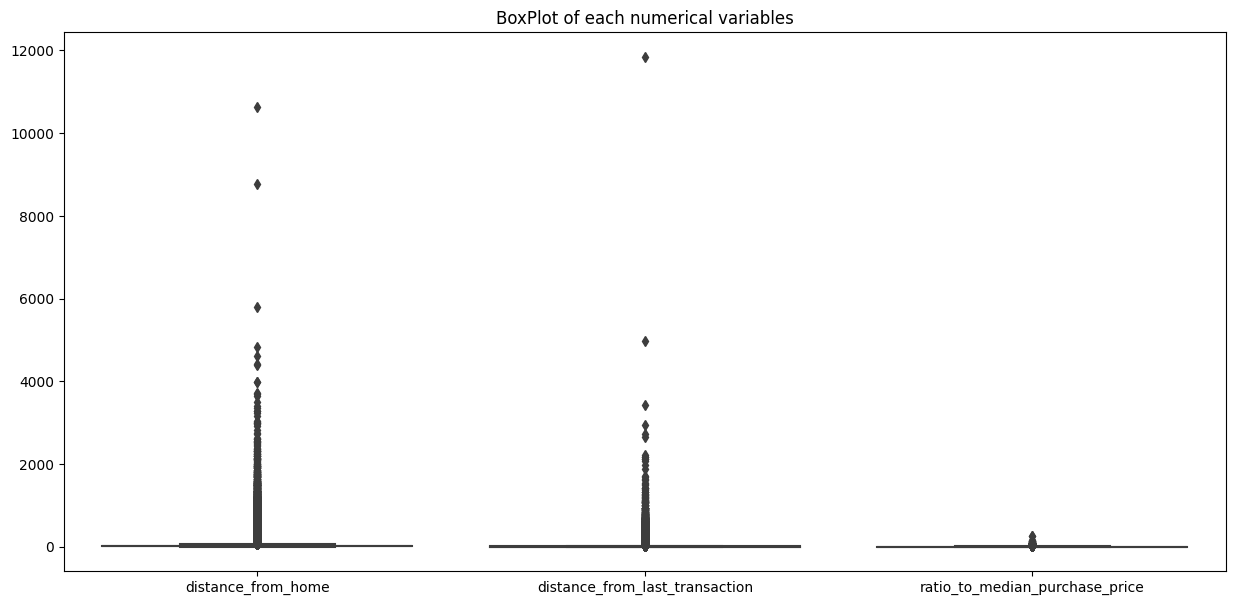

In [8]:
plt.figure(figsize = (15, 7))
sb.boxplot(data = data[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']])
plt.title('BoxPlot of each numerical variables')
plt.show()

The boxplot shown above indicates that it contains outliers that deviate very far away from the majority of the data, especially on the 'distance_from_home' and 'distance_from_last_transaction' variable

In [9]:
data.loc[(data['distance_from_home'] > 4000) | (data['distance_from_last_transaction'] > 2000)]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
33705,4601.011222,1.384575,3.836262,1.0,1.0,1.0,1.0,0.0
44453,1.586084,2160.499922,0.714847,0.0,0.0,0.0,1.0,1.0
65547,39.999601,2119.899612,2.058294,1.0,1.0,0.0,1.0,0.0
174622,4394.314607,1.336664,1.128284,1.0,0.0,0.0,1.0,1.0
215130,8.236218,2663.513077,0.596864,1.0,0.0,0.0,0.0,0.0
266995,5797.972589,0.918924,2.359630,1.0,0.0,0.0,0.0,0.0
326661,10632.723672,1.151871,3.310613,1.0,0.0,0.0,1.0,1.0
432691,1.943053,11851.104565,2.209891,1.0,1.0,0.0,1.0,0.0
472444,1.458535,3437.278746,0.751184,0.0,1.0,0.0,0.0,0.0
567609,3.397550,2724.273459,1.531129,1.0,1.0,0.0,0.0,0.0


After analysing the outliers, we conclude an assumption that the outliers might indicate that the users could had went very far away from their home or last transaction (etc. The users might had went overseas for a trip) and conduct another transaction there instead. With this assumption, we can perceive that these datas are not noisy datas. However, having outliers this large might affect the overall performance when we are evaluating our statistical methods. Hence, we try to heuristically remove a few outliers while still retaining a majority of it to retain as much information as possible

# 4. Inferences <a class='anchor' id='inferences'></a> [↑](#top)

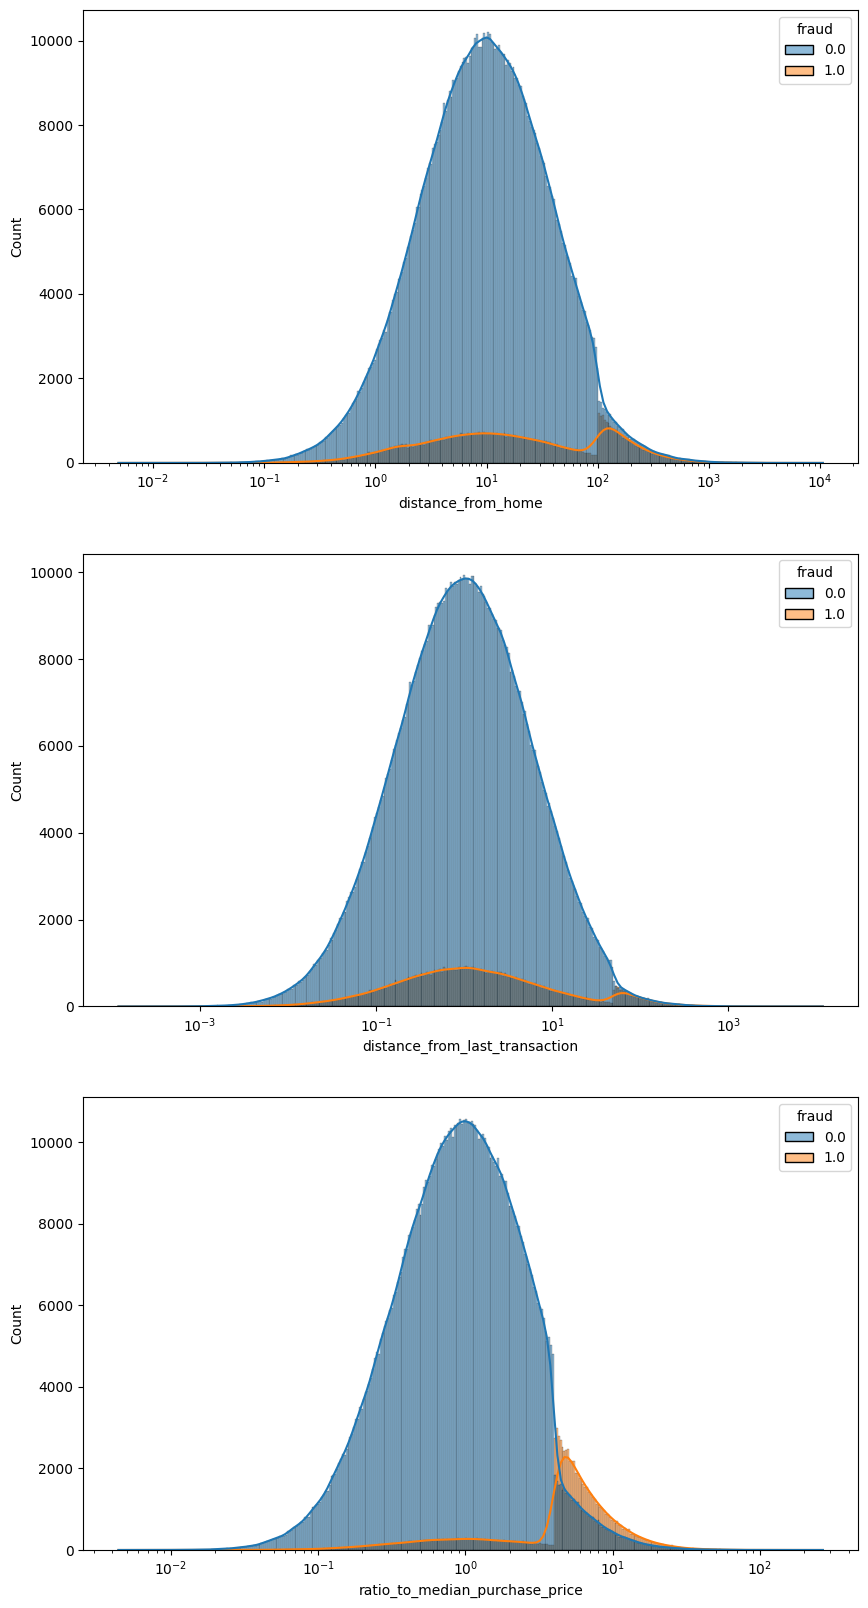

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(10,20))

# Plot the uni-variate figures for "distance_from_home"
sb.histplot(data=data, x='distance_from_home', hue='fraud', log_scale=True, kde=True, ax=axes[0])

# Plot the uni-variate figures for "distance_from_last_transaction"
sb.histplot(data=data, x='distance_from_last_transaction', hue='fraud', log_scale=True, kde=True, ax=axes[1])

# Plot the uni-variate figures for "ratio_to_median_purchase_price"
sb.histplot(data=data, x='ratio_to_median_purchase_price', hue='fraud', log_scale=True, kde=True, ax=axes[2])
plt.show()

The 3 histogram plot above shows the density of our dataset (No. of data exist within the range of values)
From the 3 plots, we can observed that:
- Transaction Genuine/Not Fraud (Target Data)
    - The distribution of the plots is very similar to a normal distribution. This shows that the values near the mean that occurs more frequently has a higher probable chance to indicate that the transaction is genuine
   
- Transaction Fraud (Target Data)
    - The distribution of the plots shows a spike on the right tail of the distribution, indicating that the larger values of the variables might have a higher probability to show that the transaction is fraud. The variable 'ratio_to_median_purchase_price' shows the highest spikes (more density) on the right tail of the distribution which may inform us that the variable has a higher correlation to our target data

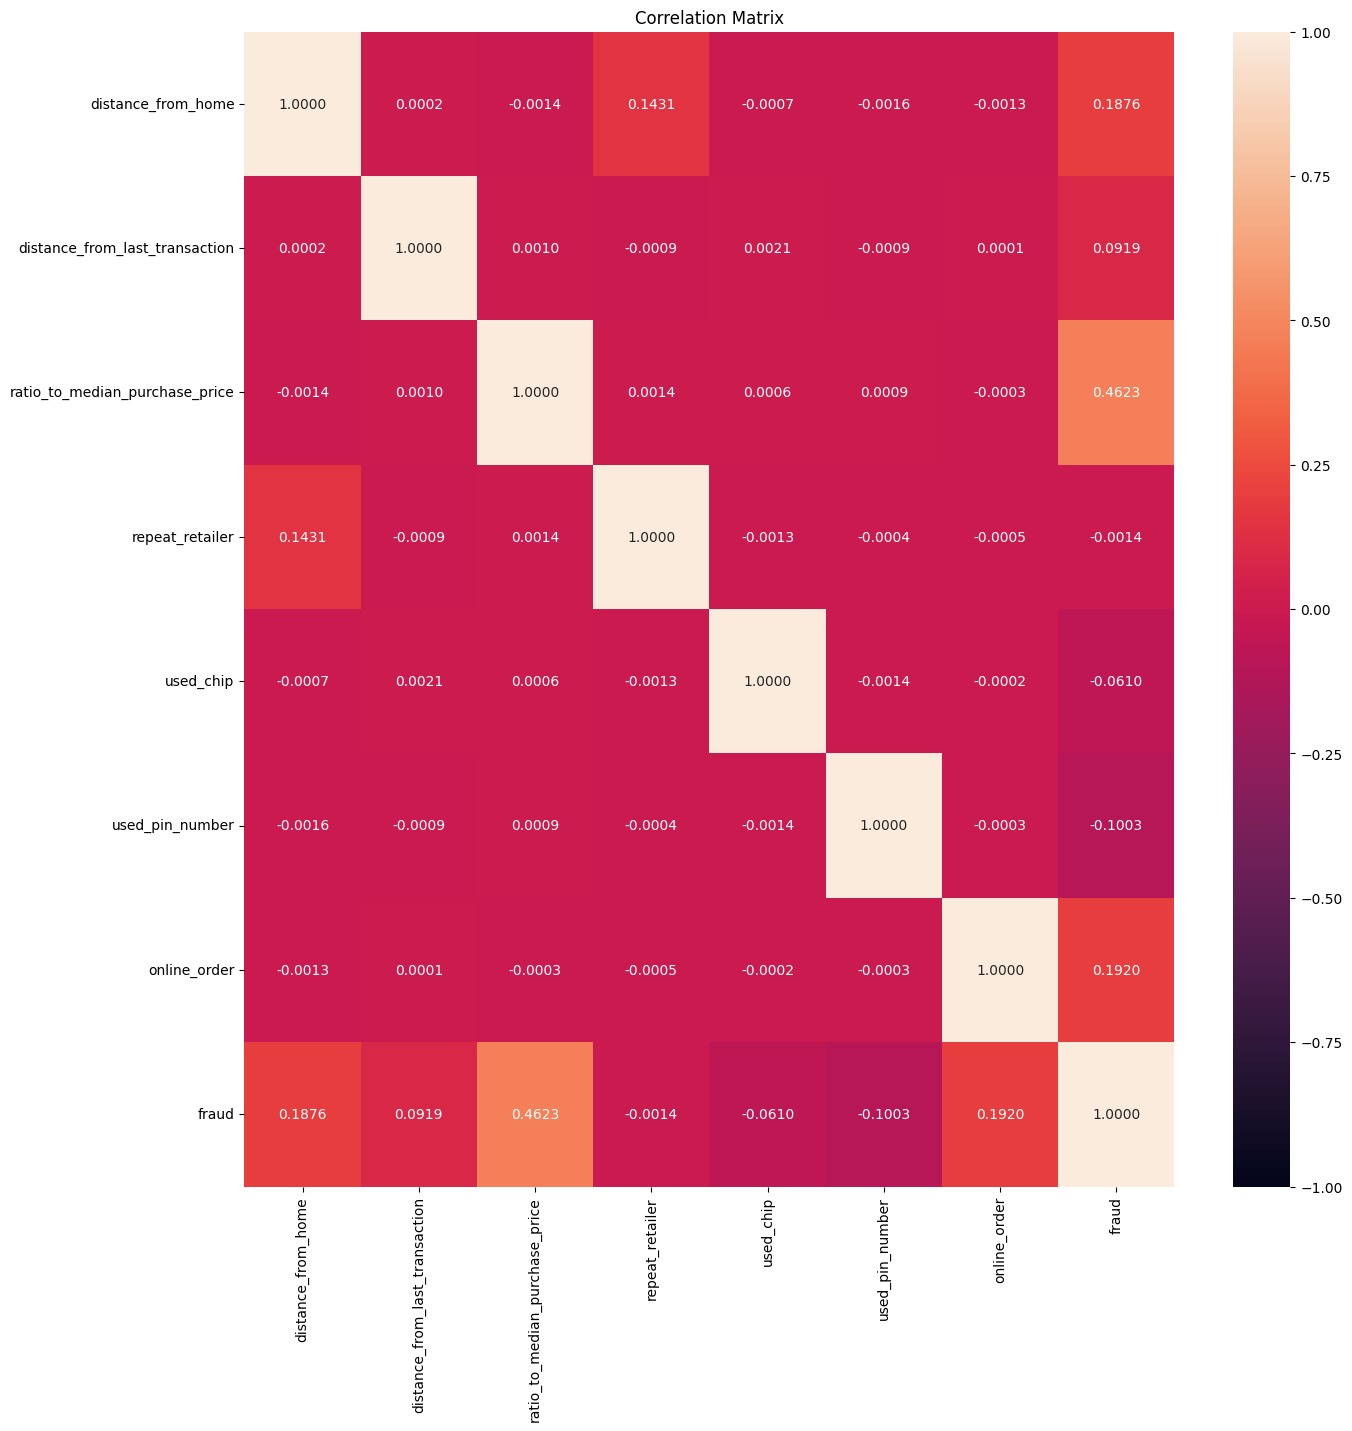

In [11]:
plt.figure(figsize = (15, 15))
sb.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".4f")
plt.title('Correlation Matrix')
plt.show()

The correlation plot above shows the correlation matrix between each and every variables. As interpreted from the histogram plot, we can see that the variable 'ratio_to_mean_purchase_price' indeed have a high correlation with the target data (fraud)

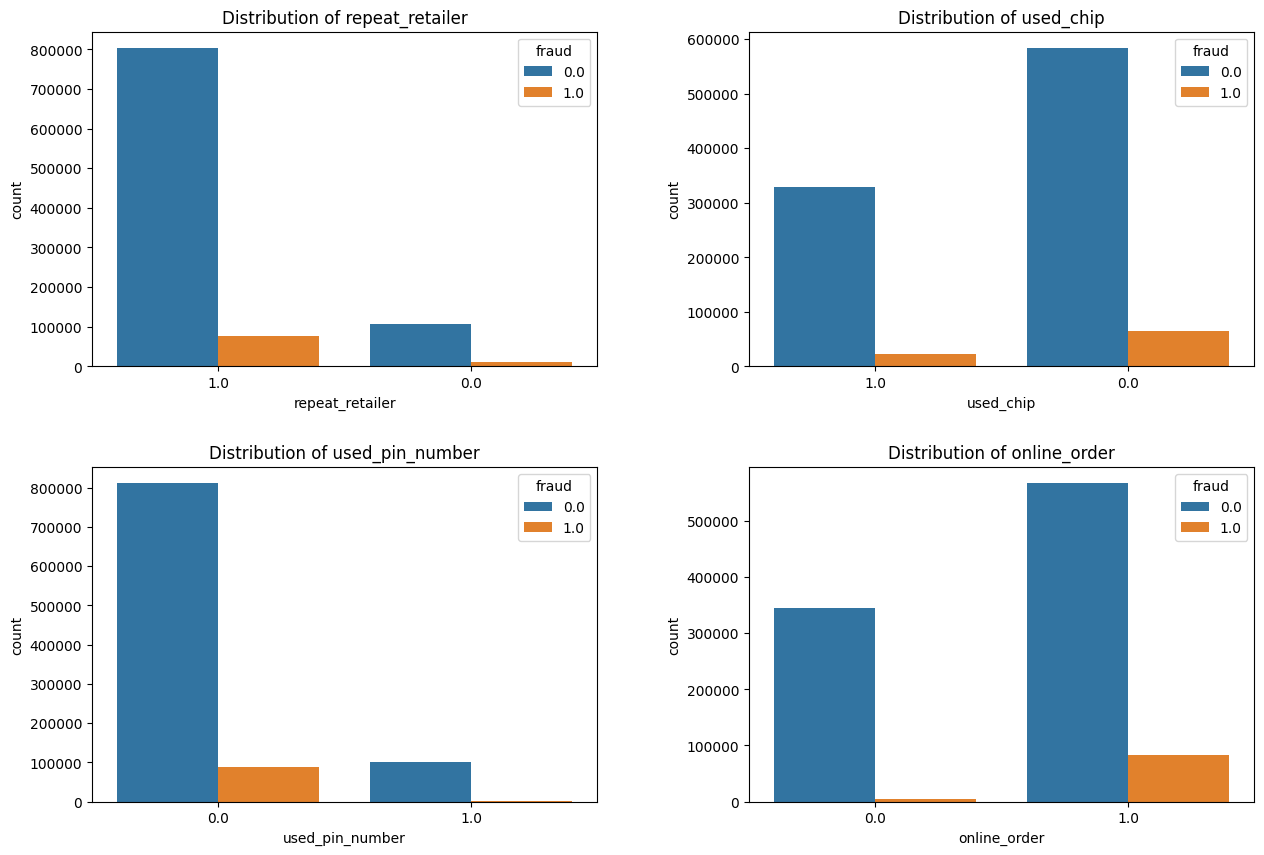

In [12]:
# Ploting the uni-variables for the remaining features
ord_data = data.columns[3:-1]

plt.figure(figsize=(15,10))
for i, col in enumerate(ord_data):
    plt.subplot(2,2,i+1)
    sb.countplot(x=data[col].astype(str), hue=data['fraud'])
    plt.title(f'Distribution of {col}')
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

The rest of the variables is plotted on a count distribution instead to showcase the spread of our target data based on the variable. From the plots, we can see that
- repeat_retailer == 1 (shows a high probability that the transaction is fraud)
- used_chip == 0 (shows an estimate of 70% probability that the transaction is fraud)
- used_pin_number == 0 (shows a high probability that the transaction is fraud)
- online_order == 1 (shows a high probability that the transaction is fraud)

# 5. Data Cleaning <a class='anchor' id='cleaning'></a> [↑](#top)

In [13]:
clean_data = data.loc[(data['distance_from_home'] < 4000) & (data['distance_from_last_transaction'] < 2000)]

<div class="alert alert-block alert-info">
<b>Assumptions:</b> We drop some of the outliers from our dataset based on two conditions
</div>

- We have a lot of data, so dropping a few outliers would not hurt much
- The outliers are not too critical, that dropping the outliers would not affect too much of our data

Even though from our analysis we concluded that the outliers is not noisy data, the purpose for conducting this outliers pruning is because some of the statistical methods conducted may be sensitive to outliers

In [14]:
print(clean_data.shape)

(999981, 8)


In [15]:
X = clean_data.iloc[:, :-1]
y = clean_data.iloc[:, -1]

# 6. Statistical Variable Test <a class='anchor' id='statstest'></a> [↑](#top)

The purpose of conducting this test is to know whether there is any relations between the independent variable and dependent variables

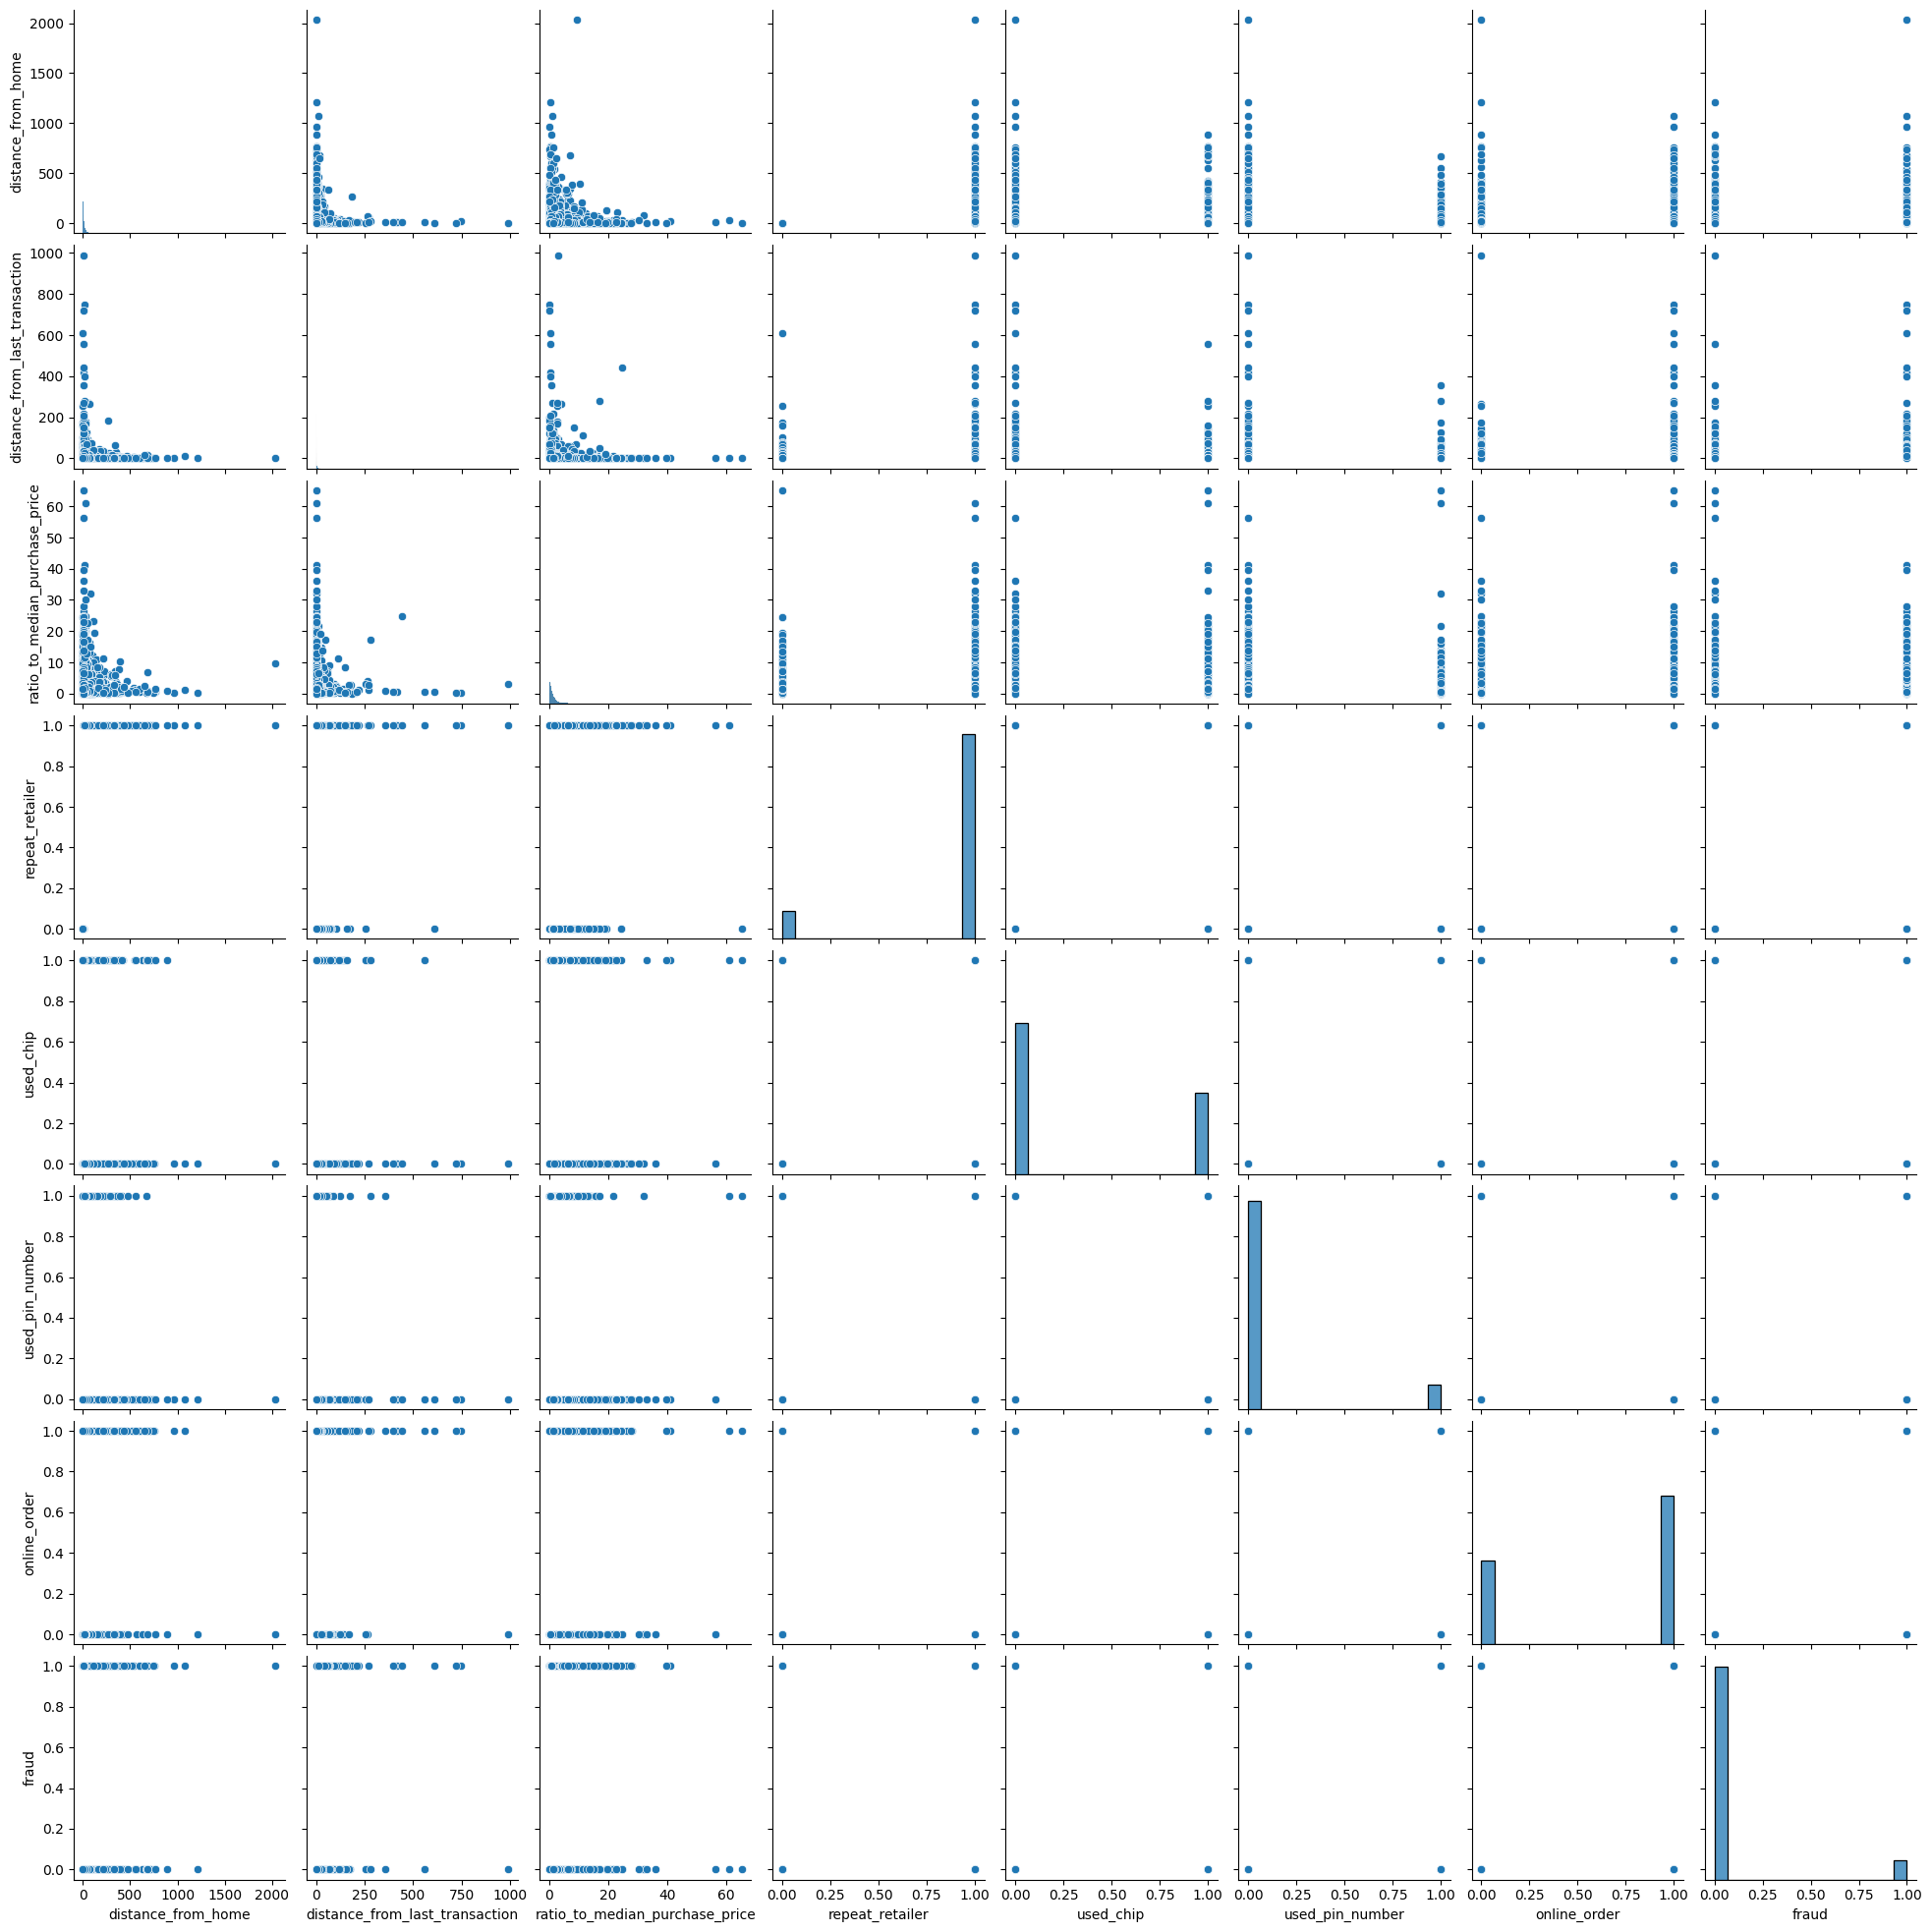

In [16]:
pairplot = sb.pairplot(clean_data.iloc[:10000])

The pairplot above showcase the relationship between variables visually, to help in analyzing it.

## Chi-Square Test <a class='anchor' id='chi'></a> [↑](#top)

The aim of this chi-square test is to conclude whether the two categorical variables are related to each other not
- [repeat_retailer & fraud]
- [used_chip & fraud]
- [used_pin_number & fraud]
- [online_order & fraud]

Null hypothesis: We define our null hypothesis which states that there is no relation between the variables. 

Alternate hypothesis: There is a significant relationship between the two variables.

In [17]:
# This alpha value denotes the probability of rejecting the Null Hypothesis
alpha = 0.05

In [18]:
# defining the table
cont1 = pd.crosstab(X.loc[:, 'repeat_retailer'],y)

stat, p, dof, expected = chi2_contingency(cont1)
 
# interpret p-value
print("Variable: repeat_retailer")
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (Null Hypothesis is rejected)')
else:
    print('Independent (Null hypothesis is not rejected)')

Variable: repeat_retailer
p value is 0.17872552014926968
Independent (Null hypothesis is not rejected)


In [19]:
# defining the table
cont2 = pd.crosstab(X.loc[:, 'used_chip'],y)

stat, p, dof, expected = chi2_contingency(cont2)
 
# interpret p-value
print("Variable: used_chip")
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (Null Hypothesis is rejected)')
else:
    print('Independent (Null hypothesis is not rejected)')

Variable: used_chip
p value is 0.0
Dependent (Null Hypothesis is rejected)


In [20]:
# defining the table
cont3 = pd.crosstab(X.loc[:, 'used_pin_number'],y)

stat, p, dof, expected = chi2_contingency(cont3)
 
# interpret p-value
print("Variable: used_pin_number")
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (Null Hypothesis is rejected)')
else:
    print('Independent (Null hypothesis is not rejected)')

Variable: used_pin_number
p value is 0.0
Dependent (Null Hypothesis is rejected)


In [21]:
# defining the table
cont4 = pd.crosstab(X.loc[:, 'online_order'],y)

stat, p, dof, expected = chi2_contingency(cont4)
 
# interpret p-value
print("Variable: online order")
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (Null Hypothesis is rejected)')
else:
    print('Independent (Null hypothesis is not rejected)')

Variable: online order
p value is 0.0
Dependent (Null Hypothesis is rejected)


## t-test <a class='anchor' id='ttest'></a> [↑](#top)

The aim of this chi-square test is to conclude whether the two categorical variables are related to each other not
- [distance_from_home & fraud]
- [distance_from_last_transaction & fraud]
- [ratio_to_median_purchase_price]

Null hypothesis: We define our null hypothesis which states that there is no relation between the variables. 

Alternate hypothesis: There is a significant relationship between the two variables.

In [22]:
t_stat, p_value = stats.ttest_ind(X.loc[:, 'distance_from_home'], y, equal_var=False)

print("Variable: distance_from_home")
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (Null Hypothesis is rejected)')
else:
    print('Independent (Null hypothesis is not rejected)')

Variable: distance_from_home
p value is 0.0
Dependent (Null Hypothesis is rejected)


In [23]:
t_stat, p_value = stats.ttest_ind(X.loc[:, 'distance_from_last_transaction'], y, equal_var=False)

print("Variable: distance_from_last_transaction")
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (Null Hypothesis is rejected)')
else:
    print('Independent (Null hypothesis is not rejected)')

Variable: distance_from_last_transaction
p value is 0.0
Dependent (Null Hypothesis is rejected)


In [24]:
t_stat, p_value = stats.ttest_ind(X.loc[:, 'ratio_to_median_purchase_price'], y, equal_var=False)

print("Variable: ratio_to_median_purchase_price")
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (Null Hypothesis is rejected)')
else:
    print('Independent (Null hypothesis is not rejected)')

Variable: ratio_to_median_purchase_price
p value is 0.0
Dependent (Null Hypothesis is rejected)


# 6. Discriminant Analysis <a class='anchor' id='da'></a> [↑](#top)

Discriminant analysis is a classification technique used to determine which variables are most important in discriminating between two or more groups. It finds a linear combination of variables that maximizes the separation between the groups.

## Linear Discriminant Analysis <a class='anchor' id='lda'></a> [↑](#top)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [27]:
y_pred = lda.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.9348840232603489
Precision:  0.9264878165118625
Recall:  0.9348840232603489


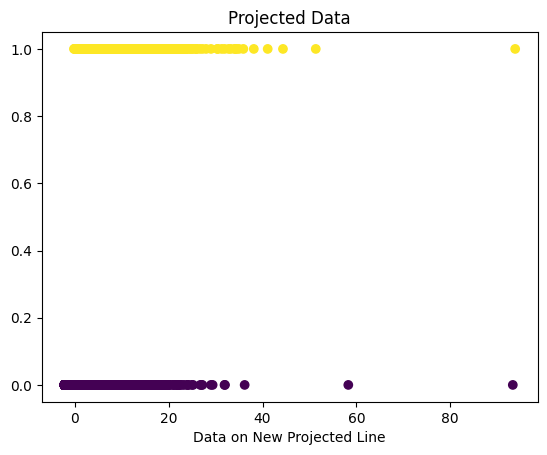

In [29]:
X_train_lda = lda.transform(X_train)

plt.scatter(X_train_lda, y_train, c=y_train)
plt.title("Projected Data")
plt.xlabel('Data on New Projected Line')
plt.show()

# 7. Dimensionality Reduction <a class='anchor' id='dr'></a> [↑](#top)

## Principal Component Analysis <a class='anchor' id='pca'></a> [↑](#top)

PCA is a dimensionality reduction technique used to identify patterns and reduce the dimensionality of multivariate data. It transforms the original variables into a new set of uncorrelated variables called principal components. It can be helpful for data visualization and identifying the most important variables in the dataset.

In [30]:
C = np.corrcoef(X.T)
print("Shape of Covariance Matrix: ", C.shape)

# Eigen Decomposition
e_values, e_vectors = LA.eig(C)

# Sorting based on decreasing eigenvalues
E_vectors = np.array([x for _,x in sorted(zip(e_values,e_vectors.T),reverse=True)]).T
E_values = np.array(sorted(e_values,reverse=True))
print("Shape of EigenValues: ", E_values.shape)
print("Shape of EigenVectors: ", E_vectors.shape)

Shape of Covariance Matrix:  (7, 7)
Shape of EigenValues:  (7,)
Shape of EigenVectors:  (7, 7)


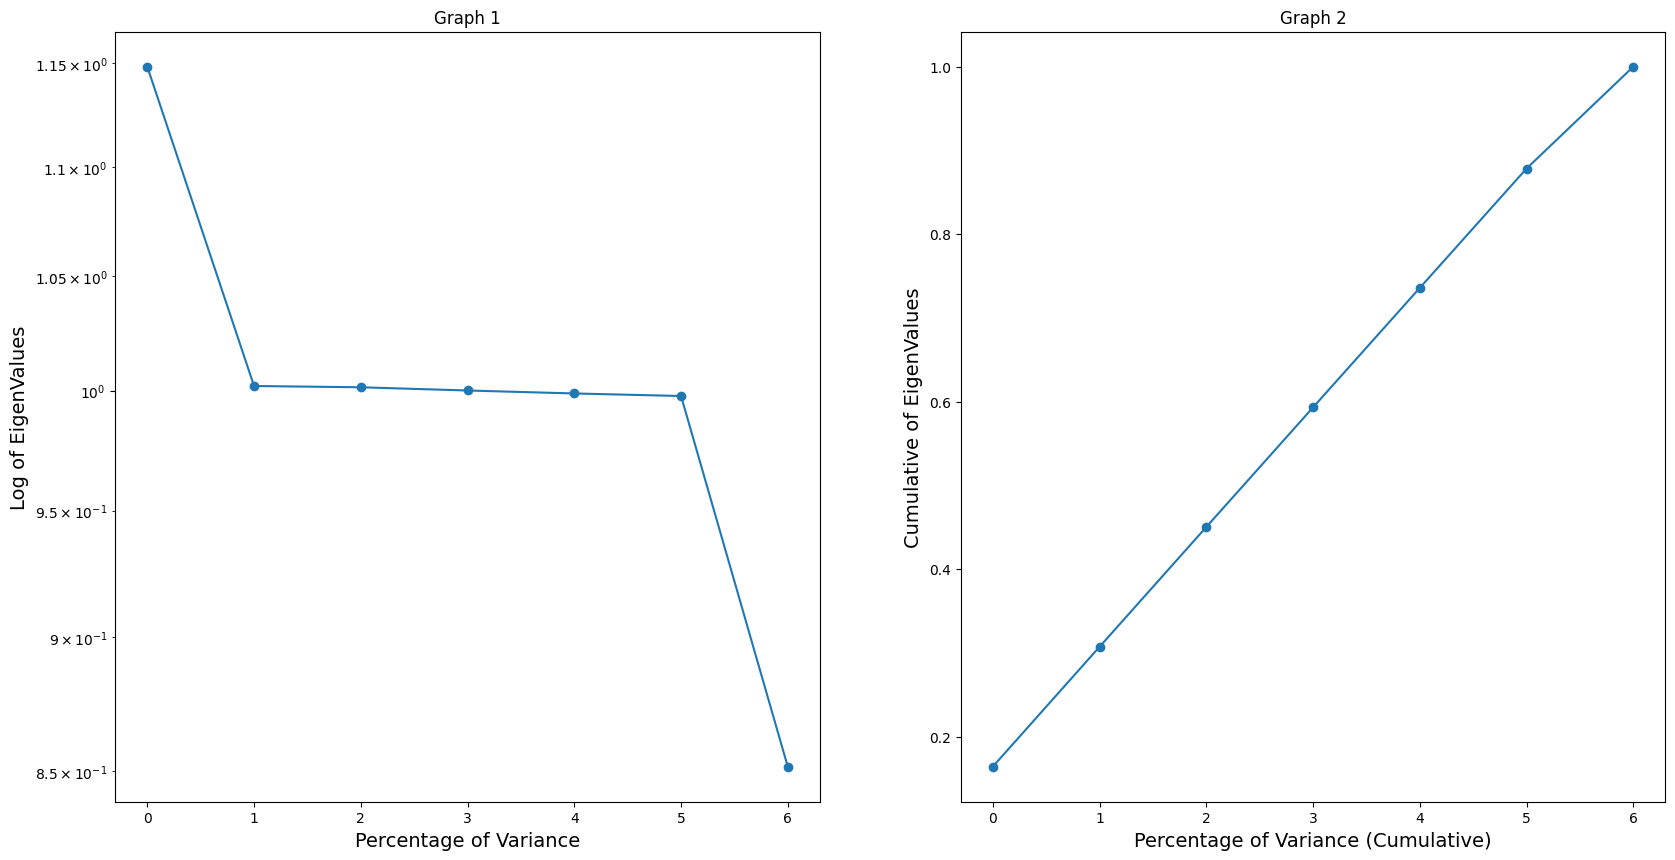

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.semilogy(E_values, '-o')
ax1.set_title('Graph 1')
ax1.set_xlabel('Percentage of Variance', fontsize=14)
ax1.set_ylabel('Log of EigenValues', fontsize=14)

ax2.plot(np.cumsum(E_values)/np.sum(E_values), '-o')
ax2.set_title('Graph 2')
ax2.set_xlabel('Percentage of Variance (Cumulative)', fontsize=14)
ax2.set_ylabel('Cumulative of EigenValues', fontsize=14)

plt.show()

In [32]:
# Kaiser-Guttman rule
# contains the indices where the eigenvalues of the correlation matrix are greater than 1. 
ev_pca = np.where(E_values > 1)[0]
for i in range(ev_pca.size):
    print(f"Percentage of Information Captured by {i+1} EigenValues:", np.cumsum(E_values[:i+1])[-1]/np.sum(E_values)*100, "%")

Percentage of Information Captured by 1 EigenValues: 16.404265454333082 %
Percentage of Information Captured by 2 EigenValues: 30.718400969330823 %
Percentage of Information Captured by 3 EigenValues: 45.024702429158886 %
Percentage of Information Captured by 4 EigenValues: 59.311361244309325 %


In [33]:
pca_loadings = pd.DataFrame(data=E_vectors, index=X.keys())
pca_loadings

,0,1,2,3,4,5,6
distance_from_home,0.707044,-0.003399,0.005894,-0.002557,0.000139,-0.013589,0.707002
distance_from_last_transaction,-0.000426,-0.614361,-0.157614,-0.292444,-0.600117,-0.389823,-0.009646
ratio_to_median_purchase_price,-0.001373,-0.513602,-0.536777,-0.056553,0.310891,0.589932,0.014452
repeat_retailer,0.706995,-0.000015,-0.010082,-0.005497,0.015498,0.001084,-0.706955
used_chip,-0.008777,-0.533638,0.377915,0.255029,0.585899,-0.404970,-0.003915
used_pin_number,-0.009989,0.261249,-0.710928,-0.011213,0.300908,-0.579245,0.005939
online_order,-0.008282,0.075773,0.196604,-0.919824,0.330368,-0.017521,0.003279


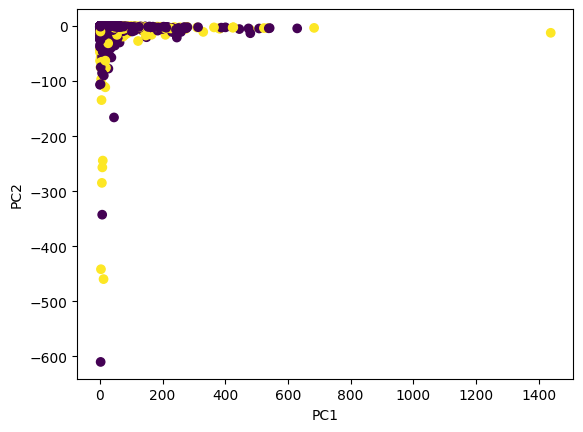

In [34]:
x_plot = X.iloc[:5000, :] @ E_vectors[:, :2]

plt.scatter(x_plot.iloc[:, 0], x_plot.iloc[:, 1], c=y[:5000])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

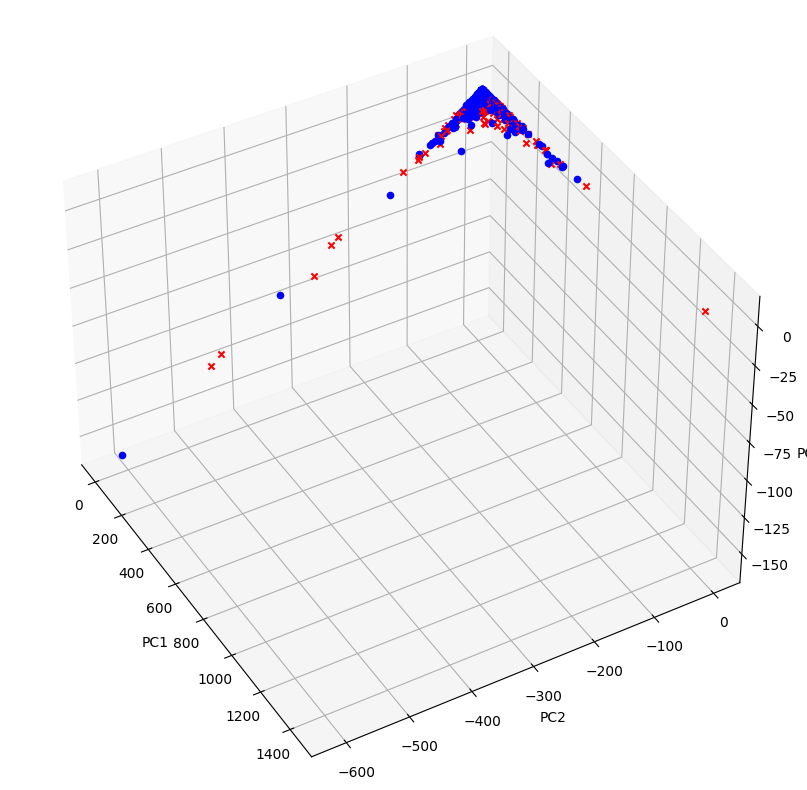

In [35]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

for i in range(5000):
    x1 = X.iloc[i, :] @ E_vectors[:, 0]
    x2 = X.iloc[i, :] @ E_vectors[:, 1]
    x3 = X.iloc[i, :] @ E_vectors[:, 2]
    
    if y[i] == 1: # Fraud 
        ax.scatter(x1, x2, x3, marker='x', color='r')
    else: # Genuine
        ax.scatter(x1, x2, x3, marker='o', color='b')
        
ax.view_init(40,-30)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

### Results using PCA projected data

In [36]:
k = 3
new_data = np.array(X @ E_vectors[:, :k])

X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.2)

In [37]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [38]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [39]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9164037460561908
Precision: 0.8967962092227796
Recall: 0.9164037460561908


## Factor Analysis with Mixed Data <a class='anchor' id='famd'></a> [↑](#top)

In [40]:
b_Data = X.copy()
b_Data['repeat_retailer'] = b_Data['repeat_retailer'].replace({0:False, 1:True})
b_Data['used_chip'] = b_Data['used_chip'].replace({0:False, 1:True})
b_Data['used_pin_number'] = b_Data['used_pin_number'].replace({0:False, 1:True})
b_Data['online_order'] = b_Data['online_order'].replace({0:False, 1:True})

In [41]:
n_factors = X.shape[1]
famd = prince.FAMD(n_components=n_factors, random_state=42,)
famd = famd.fit(b_Data)

In [42]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,2.042,18.57%,18.57%
1,2.003,18.21%,36.77%
2,2.000,18.18%,54.96%
3,1.997,18.15%,73.11%
4,1.002,9.10%,82.22%
5,0.999,9.08%,91.29%
6,0.958,8.71%,100.00%


In [43]:
# Kaiser-Guttman rule
# contains the indices where the eigenvalues of the correlation matrix are greater than 1. 
ev_famd = famd.eigenvalues_
idx = np.where(ev_famd > 1)[0]

# Number of factors that meets the requirement
n_factors_kg = idx.size
print(f"Number of factors (Kaiser-Guttman rule): {n_factors_kg}")

Number of factors (Kaiser-Guttman rule): 5


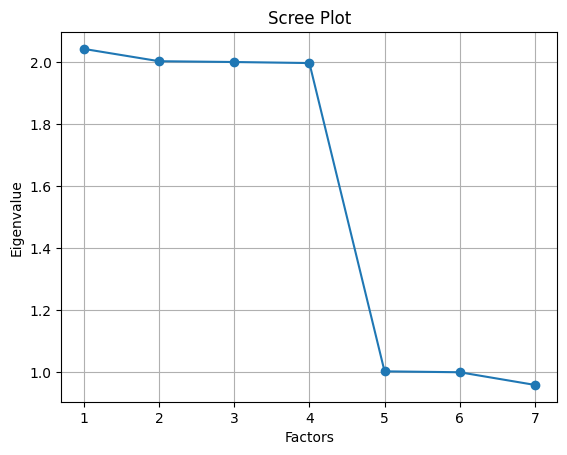

In [44]:
# Scree plot
plt.plot(range(1,n_factors+1), ev_famd, marker='o')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [45]:
famd.column_contributions_

component,0,1,2,3,4,5,6
variable,,,,,,,
distance_from_home,0.038720,4.258730e-05,3.009887e-06,1.386501e-04,1.586740e-04,3.009725e-03,9.579275e-01
distance_from_last_transaction,0.000002,1.061476e-06,2.715124e-09,1.604426e-08,4.907607e-01,5.082939e-01,9.428327e-04
ratio_to_median_purchase_price,0.000002,1.214618e-07,6.472578e-07,2.165501e-06,5.090736e-01,4.886115e-01,2.309858e-03
online_order,0.000496,3.518117e-04,4.674486e-01,3.170244e-02,2.149813e-08,6.142628e-08,1.029141e-06
repeat_retailer,0.477804,3.278947e-04,9.349583e-05,2.324353e-03,2.618960e-06,4.124998e-05,1.940685e-02
used_chip,0.002008,2.408241e-01,2.008601e-02,2.370814e-01,7.351272e-07,2.450501e-10,1.430279e-08
used_pin_number,0.000331,2.584743e-01,1.237007e-02,2.288214e-01,1.444964e-07,1.125871e-06,2.030853e-06


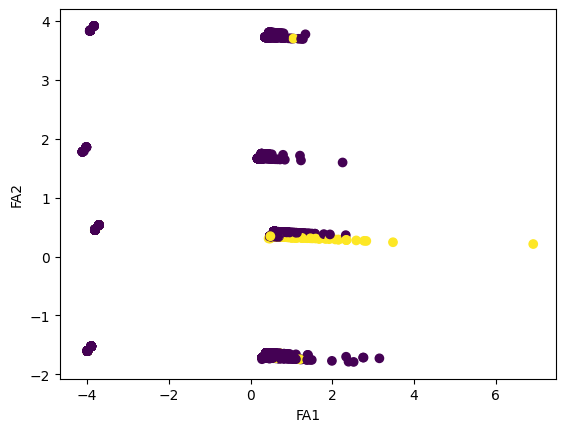

In [46]:
trans_data = famd.transform(b_Data)

plt.scatter(trans_data.iloc[:5000, 0], trans_data.iloc[:5000, 1], c=y[:5000])
plt.xlabel('FA1')
plt.ylabel('FA2')
plt.show()

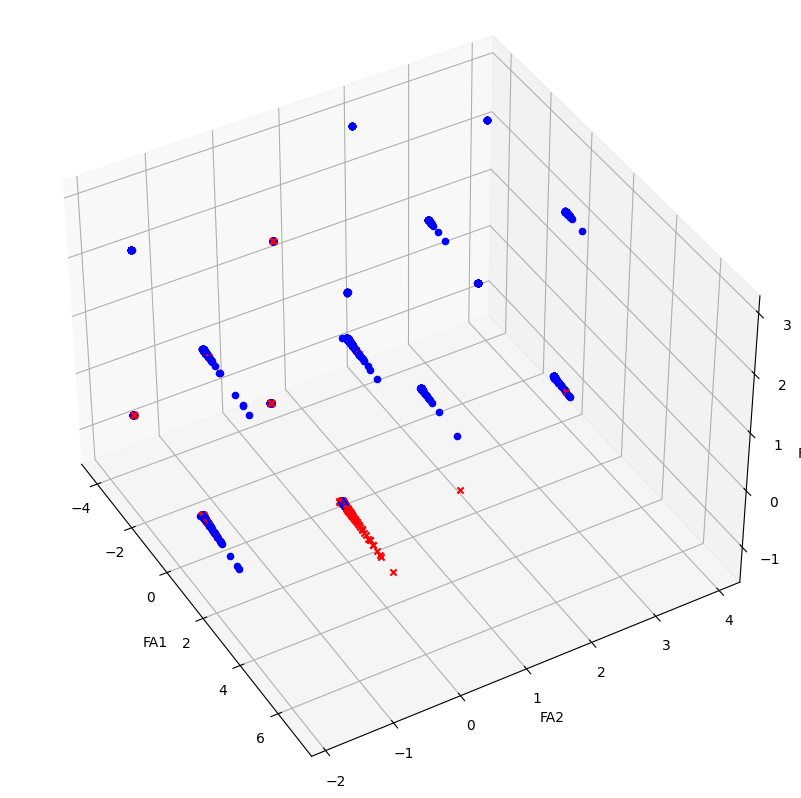

In [47]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

for i in range(5000):
    x1 = trans_data.iloc[i, 0]
    x2 = trans_data.iloc[i, 1]
    x3 = trans_data.iloc[i, 2]
    
    if y[i] == 1: # Fraud 
        ax.scatter(x1, x2, x3, marker='x', color='r')
    else: # Genuine
        ax.scatter(x1, x2, x3, marker='o', color='b')
        
ax.view_init(40,-30)
ax.set_xlabel('FA1')
ax.set_ylabel('FA2')
ax.set_zlabel('FA3')
plt.show()

### Results using FAMD projected data

In [48]:
X_train, X_test, y_train, y_test = train_test_split(trans_data.iloc[:, :3], y, test_size=0.2)

In [49]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [50]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.912608689130337
Precision: 0.8328546194761921
Recall: 0.912608689130337


# 8. Performance Evaluation <a class='anchor' id='pe'></a> [↑](#top)

<div class="alert alert-block alert-info">
<b>Evaluation:</b> We would only conduct accuracy metrics on Logistic Regression (Except for LDA) to evaluate each of our statistical methods performed
</div>

### Statistical Variable Test

From the [Statistical Variable Test](#statstest), we can deduced that the only variable which does not show much relation to our target variable 'fraud' is the independent variable 'repeat_retailer'.

In [52]:
new_X = X.drop(columns='repeat_retailer')

scaler = StandardScaler()
norm_X = scaler.fit_transform(new_X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(norm_X, y, test_size=0.2)

clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [54]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.959


With the accuracy produced, it is no suprise that it performs exceptionally well as we are only truncating a irrelevant data column from our dataset. However with this method, it does not give much context to what each of the variables really contributes in predicting the outcome

### Discriminant Analysis

From the [Discriminant Analysis](#da), we tried to seperate the target variable using a straight line linear combinations of variables and presumely we somehow managed to obtained an accuracy of $0.935$

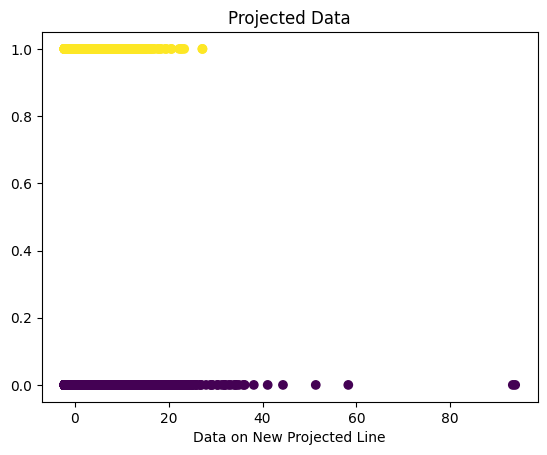

In [55]:
plt.scatter(X_train_lda, y_train, c=y_train)
plt.title("Projected Data")
plt.xlabel('Data on New Projected Line')
plt.show()

<div class="alert alert-block alert-info">
<b>Assumption:</b> We should assume that the graph plotted above is squeeze on the y-axis as the output of the newly projected data is 1-dimensional while the graph plotted is 2-dimensional which serves the purpose of showcasing the separability of the target output
</div>

From the graph, we can clearly see that the data had different classification of target output even though the data can be found within range of each other. This does not justify that a linear combination of a straight line is able to really seperate the two target variables even if the accuracy metrics said so

### Dimensionality Reduction

From the [Dimensionality Reduction](#dr), we've performed principal component analysis to identify the combinations components that derived outputs and factor analysis with mixed data to explicitly find a latent variable within the given data

For the components/factors selection, instead of selecting components that provides the highest variance captured 

(as performed in [Principal Component Analysis](#pca) & [Factor Analysis with Mixed Data](#famd))

We developed a heuristic method to test every possible components/factors and selects the components/factors that yields the highest accuracy

### Principal Component Analysis

In [56]:
# Heuristic methods of conducting cross-validation in selecting the principal components
accuracy = 0
ev = []
for i in range(7):
    for j in range(i+1, 7):
        for k in range(j+1, 7):
            vec = np.array(X @ np.array([E_vectors[:, i], E_vectors[:, j], E_vectors[:, k]]).T)
            X_train, X_test, y_train, y_test = train_test_split(vec, y, test_size=0.2, random_state=42)
            
            clf = LogisticRegression(random_state=42).fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            
            new_accuracy = accuracy_score(y_test, y_pred)
            
            if (new_accuracy > accuracy):
                accuracy = new_accuracy
                ev = [i, j, k]

print("EigenValues: ", ev)
print("Accuracy: ", accuracy)

EigenValues:  [1, 3, 4]
Accuracy:  0.939129086936304


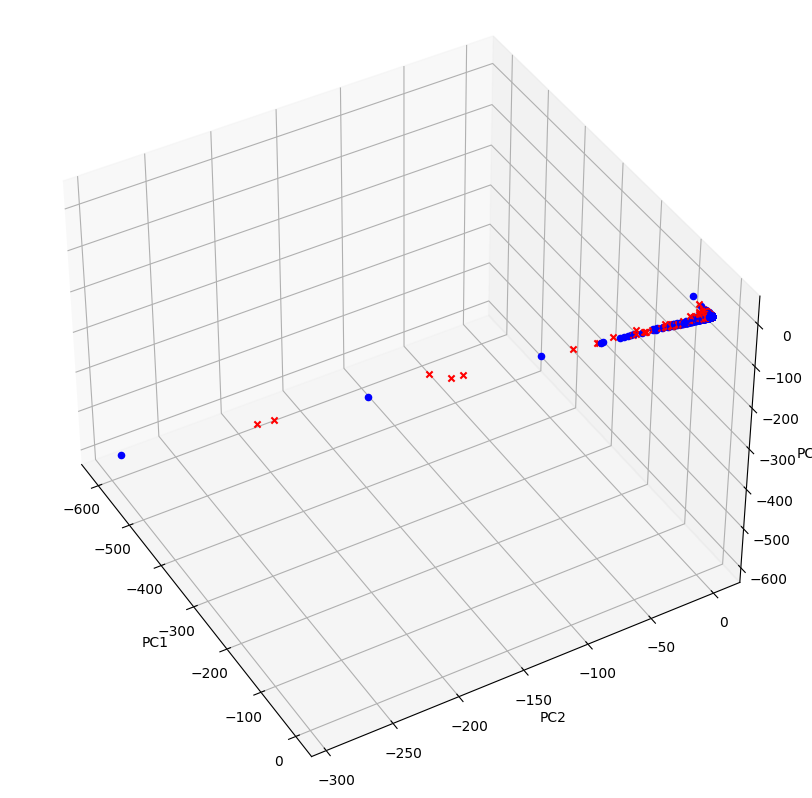

In [57]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

for i in range(5000):
    x1 = X.iloc[i, :] @ E_vectors[:, ev[0]]
    x2 = X.iloc[i, :] @ E_vectors[:, ev[1]]
    x3 = X.iloc[i, :] @ E_vectors[:, ev[2]]
    
    if y[i] == 1: # Fraud 
        ax.scatter(x1, x2, x3, marker='x', color='r')
    else: # Genuine
        ax.scatter(x1, x2, x3, marker='o', color='b')
        
ax.view_init(40,-30)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

### Factor Analysis with Mixed Data

In [58]:
# Heuristic methods of conducting cross-validation in selecting the factors
loadings = np.array(famd.column_contributions_)
accuracy = 0
ev = []

for i in range(7):
    for j in range(i+1, 7):
        for k in range(j+1, 7):
            vec = np.array(X @ np.array([loadings[:, i], loadings[:, j], loadings[:, k]]).T)
            X_train, X_test, y_train, y_test = train_test_split(vec, y, test_size=0.2, random_state=42)
            
            clf = LogisticRegression(random_state=42).fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            
            new_accuracy = accuracy_score(y_test, y_pred)
            
            if (new_accuracy > accuracy):
                accuracy = new_accuracy
                ev = [i, j, k]

print("EigenValues: ", ev)
print("Accuracy: ", accuracy)

EigenValues:  [4, 5, 6]
Accuracy:  0.9207338110071651


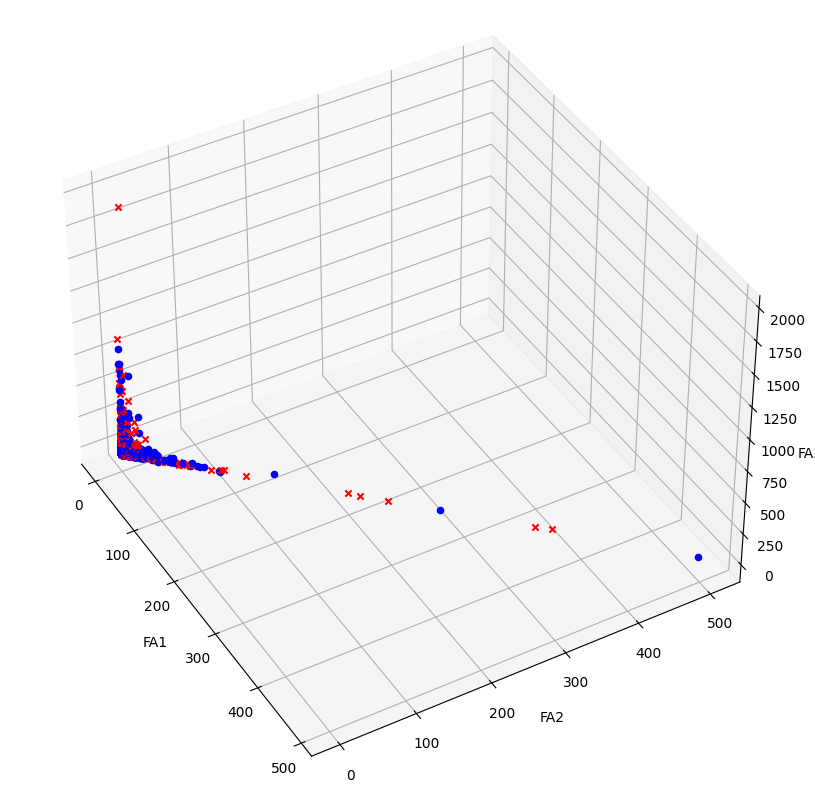

In [59]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

for i in range(5000):
    x1 = X.iloc[i, :] @ loadings[:, ev[0]]
    x2 = X.iloc[i, :] @ loadings[:, ev[1]]
    x3 = X.iloc[i, :] @ loadings[:, ev[2]]
    
    if y[i] == 1: # Fraud 
        ax.scatter(x1, x2, x3, marker='x', color='r')
    else: # Genuine
        ax.scatter(x1, x2, x3, marker='o', color='b')
        
ax.view_init(40,-30)
ax.set_xlabel('FA1')
ax.set_ylabel('FA2')
ax.set_zlabel('FA3')
plt.show()

The accuracy for both Principal Component Analysis & Factor Analysis with Mixed Data is very high, but the graphs still indicates no separability among them

Other than that, the loadings from both Principal Component Analysis and Factor Analysis with Mixed Data shows that the analysis we've done on the Statistical Variable Test holds true as the variable 'repeat_retailer' does not contribute much to the target output

In [60]:
pca_loadings

,0,1,2,3,4,5,6
distance_from_home,0.707044,-0.003399,0.005894,-0.002557,0.000139,-0.013589,0.707002
distance_from_last_transaction,-0.000426,-0.614361,-0.157614,-0.292444,-0.600117,-0.389823,-0.009646
ratio_to_median_purchase_price,-0.001373,-0.513602,-0.536777,-0.056553,0.310891,0.589932,0.014452
repeat_retailer,0.706995,-0.000015,-0.010082,-0.005497,0.015498,0.001084,-0.706955
used_chip,-0.008777,-0.533638,0.377915,0.255029,0.585899,-0.404970,-0.003915
used_pin_number,-0.009989,0.261249,-0.710928,-0.011213,0.300908,-0.579245,0.005939
online_order,-0.008282,0.075773,0.196604,-0.919824,0.330368,-0.017521,0.003279


In [61]:
famd.column_contributions_

component,0,1,2,3,4,5,6
variable,,,,,,,
distance_from_home,0.038720,4.258730e-05,3.009887e-06,1.386501e-04,1.586740e-04,3.009725e-03,9.579275e-01
distance_from_last_transaction,0.000002,1.061476e-06,2.715124e-09,1.604426e-08,4.907607e-01,5.082939e-01,9.428327e-04
ratio_to_median_purchase_price,0.000002,1.214618e-07,6.472578e-07,2.165501e-06,5.090736e-01,4.886115e-01,2.309858e-03
online_order,0.000496,3.518117e-04,4.674486e-01,3.170244e-02,2.149813e-08,6.142628e-08,1.029141e-06
repeat_retailer,0.477804,3.278947e-04,9.349583e-05,2.324353e-03,2.618960e-06,4.124998e-05,1.940685e-02
used_chip,0.002008,2.408241e-01,2.008601e-02,2.370814e-01,7.351272e-07,2.450501e-10,1.430279e-08
used_pin_number,0.000331,2.584743e-01,1.237007e-02,2.288214e-01,1.444964e-07,1.125871e-06,2.030853e-06


From the loadings, we can see that the variable 'repeat_retailer has not much impact in most of the components/factors except for components/factors that includes the variable 'distance_from_home' as they are correlated to each other as shown in the correlation matrix shown in [Inferences](#inferences)

### Final Verdict

Overall, we can conclude that some of the variables do make an impact in predicting the output variables, which is proven especially in the Statistical Variable Test. However, conducting Dimensionality Reduction would not be ideal as most of the variables are needed to perform precise prediction.

In regards to the accuracy metrics obtained from each test, we concluded that the dataset is skewed as the majority of the dataset has a target output of 'genuine', which causes most predictions to be precise in 1 categorical target but not the other. Hence, the accuracy does not truly dictates how well our Logistic Model is

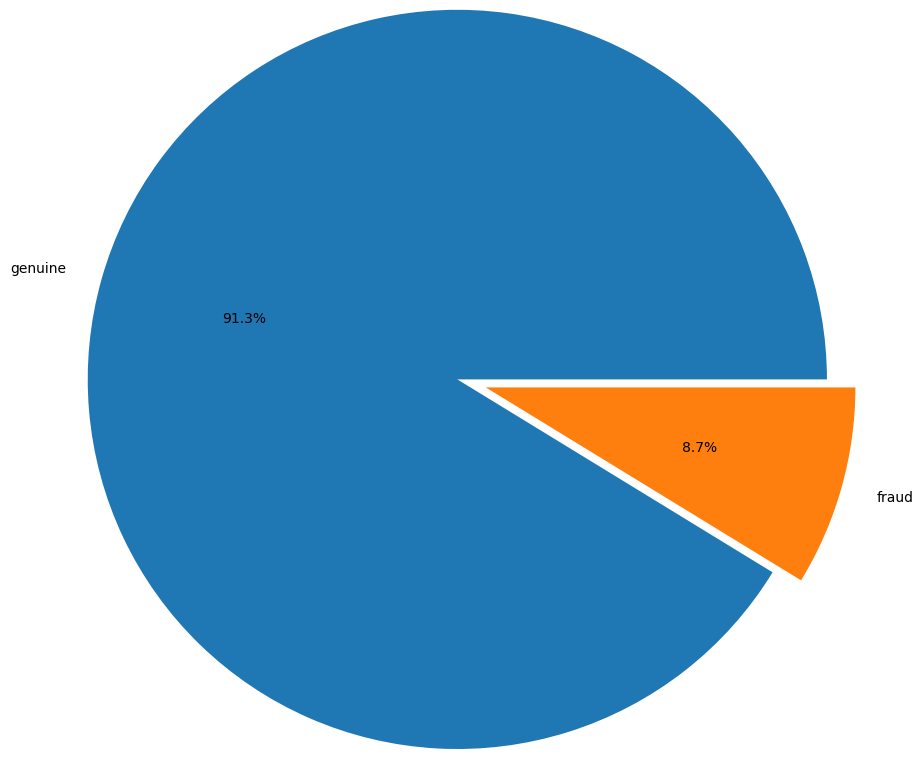

<Figure size 2000x2000 with 0 Axes>

In [62]:
# Plotting the counts of data being genuine or fraud
vc = data['fraud'].value_counts(ascending=False)

plt.pie(x=vc.values, labels=['genuine','fraud'], explode=[0.0, 0.2], radius=2.5, autopct='%1.1f%%')
plt.figure(figsize=(20,20))
plt.show()